<h2>Project introduction</h2>

In [1]:
# """
# main python file to run the power flow of KU distribution system 

# External grid: A generator has been modelled as an external grid, its control is set to Slack

# Nomenclature
# -----------------
# -----------------
# HVB -> High voltage Bus
# LVB1 -> Low voltage Bus number 1
# Line1_2 -> Line connected between LVB1(low voltage bus number 1) and LVB2(bus number 2) 
# Load3 -> Load connected to LVB3(low voltage bus number 3)

# Parameters
# -------------------
# -------------------
# line resistance = 0.082 ohm/km
# line reactance = 0.07 ohm/km

# """

<h2>Import</h2>

In [2]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import cartopy.crs as ccrs
import math
import matplotlib.ticker as mticker

<h2>Create Network</h2>

In [3]:
network = pypsa.Network()

# add high voltage bus
network.add("Bus", "HVB", v_nom = 11.0, y = 27.61964, x = 85.536 )

# add low voltage buses
# for i in range(1,53):
#     network.add("Bus", f"LVB{i}", v_nom = 0.4)

network.add("Bus", "LVB1", v_nom = 0.4, y = 27.61964, x = 85.5367)
network.add("Bus", "LVB2", v_nom = 0.4, y = 27.61967, x = 85.53733)
network.add("Bus", "LVB3", v_nom = 0.4, y = 27.61948, x = 85.53724)
network.add("Bus", "LVB4", v_nom=0.4, y=27.619527817, x=85.537918091)
network.add("Bus", "LVB5", v_nom=0.4, y=27.6198, x=85.53804)
network.add("Bus", "LVB6", v_nom=0.4, y=27.61941, x=85.53802)
network.add("Bus", "LVB7", v_nom=0.4, y=27.61953, x=85.5383)
network.add("Bus", "LVB8", v_nom=0.4, y=27.61955, x=85.5385)
network.add("Bus", "LVB9", v_nom=0.4, y=27.6191, x=85.53842)
network.add("Bus", "LVB10", v_nom=0.4, y=27.61897, x=85.53857)
network.add("Bus", "LVB11", v_nom=0.4, y=27.619102478, x=85.538719177)
network.add("Bus", "LVB12", v_nom=0.4, y=27.61916, x=85.5388)
network.add("Bus", "LVB13", v_nom=0.4, y=27.61934, x=85.53885)
network.add("Bus", "LVB14", v_nom=0.4, y=27.61884, x=85.53873)
network.add("Bus", "LVB15", v_nom=0.4, y=27.61869, x=85.53938)
network.add("Bus", "LVB16", v_nom=0.4, y=27.61891, x=85.53925)
network.add("Bus", "LVB17", v_nom=0.4, y=27.61859, x=85.53959)
network.add("Bus", "LVB18", v_nom=0.4, y=27.61946, x=85.53967)
network.add("Bus", "LVB19", v_nom=0.4, y=27.61943, x=85.53953)
network.add("Bus", "LVB20", v_nom=0.4, y=27.61867, x=85.53896)
network.add("Bus", "LVB21", v_nom=0.4, y=27.61834, x=85.53885)
network.add("Bus", "LVB22", v_nom=0.4, y=27.61812, x=85.53921)
network.add("Bus", "LVB23", v_nom=0.4, y=27.61769, x=85.53912)
network.add("Bus", "LVB24", v_nom=0.4, y=27.61979, x=85.5371)
network.add("Bus", "LVB25", v_nom=0.4, y=27.61983, x=85.5372)
network.add("Bus", "LVB26", v_nom=0.4, y=27.61978, x=85.53751)
network.add("Bus", "LVB27", v_nom=0.4, y=27.61988, x=85.53743)
network.add("Bus", "LVB28", v_nom=0.4, y=27.62006, x=85.53776)
network.add("Bus", "LVB29", v_nom=0.4, y=27.62046, x=85.53813)
network.add("Bus", "LVB30", v_nom=0.4, y=27.62061, x=85.53827)
network.add("Bus", "LVB31", v_nom=0.4, y=27.61916, x=85.53784)
network.add("Bus", "LVB32", v_nom=0.4, y=27.6188, x=85.53804)
network.add("Bus", "LVB33", v_nom=0.4, y=27.61848, x=85.53786)
network.add("Bus", "LVB34", v_nom=0.4, y=27.61849, x=85.53833)
network.add("Bus", "LVB35", v_nom=0.4, y=27.61786, x=85.53768)
network.add("Bus", "LVB36", v_nom=0.4, y=27.61805, x=85.53786)
network.add("Bus", "LVB37", v_nom=0.4, y=27.61771, x=85.53714)
network.add("Bus", "LVB38", v_nom=0.4, y=27.61776, x=85.53674)
network.add("Bus", "LVB39", v_nom=0.4, y=27.61743, x=85.5395)
network.add("Bus", "LVB40", v_nom=0.4, y=27.61751, x=85.53745)
network.add("Bus", "LVB41", v_nom=0.4, y=27.61745, x=85.5372)
network.add("Bus", "LVB42", v_nom=0.4, y=27.61785, x=85.53823)
network.add("Bus", "LVB43", v_nom=0.4, y=27.6177, x=85.53833)
network.add("Bus", "LVB44", v_nom=0.4, y=27.61752, x=85.53911)
network.add("Bus", "LVB45", v_nom=0.4, y=27.61749, x=85.53897)
network.add("Bus", "LVB46", v_nom=0.4, y=27.619632721, x=85.538276672)
network.add("Bus", "LVB47", v_nom=0.4, y=27.61966, x=85.53875)
network.add("Bus", "LVB48", v_nom=0.4, y=27.61988, x=85.53927)
network.add("Bus", "LVB49", v_nom=0.4, y=27.61981, x=85.53934)
network.add("Bus", "LVB50", v_nom=0.4, y=27.61999, x=85.53902)
network.add("Bus", "LVB51", v_nom=0.4, y=27.61991, x=85.53953)
network.add("Bus", "LVB52", v_nom=0.4, y=27.61986, x=85.53779)


# add an external network to the high voltage bus
network.add("Generator", "External network", bus = "HVB", control = "Slack")

# add a transformer between HVB and LVB1
# network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
#         s_nom = 0.25*1.25)
network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
           s_nom = 99999999)

# add the lines between the low voltage buses
network.add("Line", "Line1_2", bus0 = "LVB1", bus1 = "LVB2", length = 0.039, r = 0.082*0.039, x = 0.07*0.039)
network.add("Line", "Line2_3", bus0 = "LVB2", bus1 = "LVB3", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line2_4", bus0 = "LVB2", bus1 = "LVB4", length = 0.1485, r = 0.082*0.1485, x = 0.07*0.1485)
network.add("Line", "Line4_5", bus0 = "LVB4", bus1 = "LVB5", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_6", bus0 = "LVB4", bus1 = "LVB6", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_7", bus0 = "LVB4", bus1 = "LVB7", length = 0.03774, r = 0.082*0.03774, x = 0.07*0.03774)
network.add("Line", "Line7_8", bus0 = "LVB7", bus1 = "LVB8", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line7_9", bus0 = "LVB7", bus1 = "LVB9", length = 0.04611, r = 0.082*0.04611, x = 0.07*0.04611)
network.add("Line", "Line9_10", bus0 = "LVB9", bus1 = "LVB10", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line9_11", bus0 = "LVB9", bus1 = "LVB11", length = 0.03551, r = 0.082*0.03551, x = 0.07*0.03551)
network.add("Line", "Line11_12", bus0 = "LVB11", bus1 = "LVB12", length = 0.01087, r = 0.082*0.01087, x = 0.07*0.01087)
network.add("Line", "Line12_13", bus0 = "LVB12", bus1 = "LVB13", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line12_14", bus0 = "LVB12", bus1 = "LVB14", length = 0.0307, r = 0.082*0.0307, x = 0.07*0.0307)
network.add("Line", "Line14_15", bus0 = "LVB14", bus1 = "LVB15", length = 0.04298, r = 0.082*0.04298, x = 0.07*0.04298)
network.add("Line", "Line15_16", bus0 = "LVB15", bus1 = "LVB16", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_17", bus0 = "LVB15", bus1 = "LVB17", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_18", bus0 = "LVB15", bus1 = "LVB18", length = 0.09234, r = 0.082*0.09234, x = 0.07*0.09234)
network.add("Line", "Line18_19", bus0 = "LVB18", bus1 = "LVB19", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line14_20", bus0 = "LVB14", bus1 = "LVB20", length = 0.033, r = 0.082*0.033, x = 0.07*0.033)
network.add("Line", "Line20_21", bus0 = "LVB20", bus1 = "LVB21", length = 0.06867, r = 0.082*0.06867, x = 0.07*0.06867)
network.add("Line", "Line21_22", bus0 = "LVB21", bus1 = "LVB22", length = 0.04, r = 0.082*0.04, x = 0.07*0.04)
network.add("Line", "Line21_23", bus0 = "LVB21", bus1 = "LVB23", length = 0.06259, r = 0.082*0.06259, x = 0.07*0.06259)
network.add("Line", "Line1_24", bus0 = "LVB1", bus1 = "LVB24", length = 0.0413, r = 0.082*0.0413, x = 0.07*0.0413)
network.add("Line", "Line24_25", bus0 = "LVB24", bus1 = "LVB25", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line24_26", bus0 = "LVB24", bus1 = "LVB26", length = 0.05058, r = 0.082*0.05058, x = 0.07*0.05058)
network.add("Line", "Line26_27", bus0 = "LVB26", bus1 = "LVB27", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line27_28", bus0 = "LVB27", bus1 = "LVB28", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_52", bus0 = "LVB26", bus1 = "LVB52", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_29", bus0 = "LVB26", bus1 = "LVB29", length = 0.10924, r = 0.082*0.10924, x = 0.07*0.10924)
network.add("Line", "Line29_30", bus0 = "LVB29", bus1 = "LVB30", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_31", bus0 = "LVB4", bus1 = "LVB31", length = 0.04907, r = 0.082*0.04907, x = 0.07*0.04907)
network.add("Line", "Line31_32", bus0 = "LVB31", bus1 = "LVB32", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line31_33", bus0 = "LVB31", bus1 = "LVB33", length = 0.04446, r = 0.082*0.04446, x = 0.07*0.04446)
network.add("Line", "Line33_34", bus0 = "LVB33", bus1 = "LVB34", length = 0.16, r = 0.082*0.16, x = 0.07*0.16)
network.add("Line", "Line33_35", bus0 = "LVB33", bus1 = "LVB35", length = 0.09695, r = 0.082*0.09695, x = 0.07*0.09695)
network.add("Line", "Line35_36", bus0 = "LVB35", bus1 = "LVB36", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_37", bus0 = "LVB35", bus1 = "LVB37", length = 0.05521, r = 0.082*0.05521, x = 0.07*0.05521)
network.add("Line", "Line37_38", bus0 = "LVB37", bus1 = "LVB38", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line37_39", bus0 = "LVB37", bus1 = "LVB39", length = 0.141, r = 0.082*0.141, x = 0.07*0.141)
network.add("Line", "Line37_40", bus0 = "LVB37", bus1 = "LVB40", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line40_41", bus0 = "LVB40", bus1 = "LVB41", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_42", bus0 = "LVB35", bus1 = "LVB42", length = 0.05915, r = 0.082*0.05915, x = 0.07*0.05915)
network.add("Line", "Line42_43", bus0 = "LVB42", bus1 = "LVB43", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line42_44", bus0 = "LVB42", bus1 = "LVB44", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line44_45", bus0 = "LVB44", bus1 = "LVB45", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line7_46", bus0 = "LVB7", bus1 = "LVB46", length = 0.01352, r = 0.082*0.01352, x = 0.07*0.01352)
network.add("Line", "Line46_47", bus0 = "LVB46", bus1 = "LVB47", length = 0.04956, r = 0.082*0.04956, x = 0.07*0.04956)
network.add("Line", "Line47_48", bus0 = "LVB47", bus1 = "LVB48", length = 0.05461, r = 0.082*0.05461, x = 0.07*0.05461)
network.add("Line", "Line48_49", bus0 = "LVB48", bus1 = "LVB49", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_50", bus0 = "LVB48", bus1 = "LVB50", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_51", bus0 = "LVB48", bus1 = "LVB51", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)

# set the power factor of 0.95
PF = 0.95
tan_phi = math.sqrt(1-PF**2)/PF

# add a load to LVB3 -> Multipurpose Hall
network.add("Load", "Load3", bus = "LVB3", p_set = 0.00621, q_set = 0.00621*tan_phi)

# add loads to LVB5(Block 10) and LVB6(Block 11)
network.add("Load", "Load5", bus = "LVB5", p_set = 0.00450, q_set = 0.00450*tan_phi)
network.add("Load", "Load6", bus = "LVB6", p_set = 0.00660, q_set = 0.00660*tan_phi)

# add a load to LVB8(Administration)
network.add("Load", "Load8", bus = "LVB8", p_set = 0.00850, q_set = 0.00850*tan_phi)

# add a load to LVB10(Library)
network.add("Load", "Load10", bus = "LVB10", p_set = 0.00621, q_set = 0.00621*tan_phi)

# add a load to LVB13(CV Raman Hall)
network.add("Load", "Load13", bus = "LVB13", p_set = 0.007770, q_set = 0.00770*tan_phi)

# add a load to LVB16(Science Block)
network.add("Load", "Load16", bus = "LVB16", p_set = 0.01040, q_set = 0.01040*tan_phi)

# add a load to LVB17(AAC Block)
network.add("Load", "Load17", bus = "LVB17", p_set = 0.007220, q_set = 0.00722*tan_phi)

# add a load to LVB19(Biotechnology Block)
network.add("Load", "Load19", bus = "LVB19", p_set = 0.00621, q_set = 0.00621*tan_phi)

# add a load to LVB22(Girls hostel)
network.add("Load", "Load22", bus = "LVB22", p_set = 0.00621, q_set = 0.00621*tan_phi)

# add a load to LVB23(A5 - Family Quarter)
network.add("Load", "Load23", bus = "LVB23", p_set = 0.00660, q_set = 0.00660*tan_phi)

# add a load to LVB25(Mechanical Block)
network.add("Load", "Load25", bus = "LVB25", p_set = 0.01220, q_set = 0.01220*tan_phi)

# add a load to LVB27(TTC_Block A)
network.add("Load", "Load27", bus = "LVB27", p_set = 0.00621, q_set = 0.00621*tan_phi)

# add a load to LVB28(TTC 2)
network.add("Load", "Load28", bus = "LVB28", p_set = 0.009070, q_set = 0.00907*tan_phi)

# add a load to LVB52(SOM Lab)
network.add("Load", "Load52", bus = "LVB52", p_set = 0.01020, q_set = 0.0102*tan_phi)

# add a load to LVB30(ATM_NIMB)
network.add("Load", "Load30", bus = "LVB30", p_set = 0.01550, q_set = 0.01550*tan_phi)

# add a load to LVB32(Pharmacy Block)
network.add("Load", "Load32", bus = "LVB32", p_set = 0.008040, q_set = 0.008040*tan_phi)

# add a load to LVB36(KU MESH)
network.add("Load", "Load36", bus = "LVB36", p_set = 0.01220, q_set = 0.01220*tan_phi)

# add a load to LVB38(KU Boys Hostel)
network.add("Load", "Load38", bus = "LVB38", p_set = 0.01880, q_set = 0.01880*tan_phi)

# add a load to LVB40(KU_TTC)
network.add("Load", "Load40", bus = "LVB40", p_set = 0.007660, q_set = 0.00766*tan_phi)

# add a load to LVB41(KU_BOYS)
network.add("Load", "Load41", bus = "LVB41", p_set = 0.01150, q_set = 0.0115*tan_phi)

# add a load to LVB43(Staff Quarter)
network.add("Load", "Load43", bus = "LVB43", p_set = 0.01220, q_set = 0.01220*tan_phi)

# add a load to LVB45(Nepal invesment Bank)
network.add("Load", "Load45", bus = "LVB45", p_set = 0.009660, q_set = 0.00966*tan_phi)

# add a load to LVB49(Block 8)
network.add("Load", "Load49", bus = "LVB49", p_set = 0.00921, q_set = 0.00921*tan_phi)

# add a load to LVB50(Block 9)
network.add("Load", "Load50", bus = "LVB50", p_set = 0.01470, q_set = 0.01470*tan_phi)

# add a load to LVB51(TTL)
network.add("Load", "Load51", bus = "LVB51", p_set = 0.009770, q_set = 0.00977*tan_phi)

In [4]:
network.consistency_check()

<h2>Load Flow & Network Plot</h2>

In [5]:
# This section first fetches data every 5 minutes from WiFi energy meters installed in each block by using 
# the API provided by iammeter. Total three phase power is retrieved from each meter and p_set of the 
# corresponding loads is updated in the network.It then performs the NR load flow of the network and plots the result.
# All of these processes are done inside an infinite while loop for real time visualization.


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.015618 seconds
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



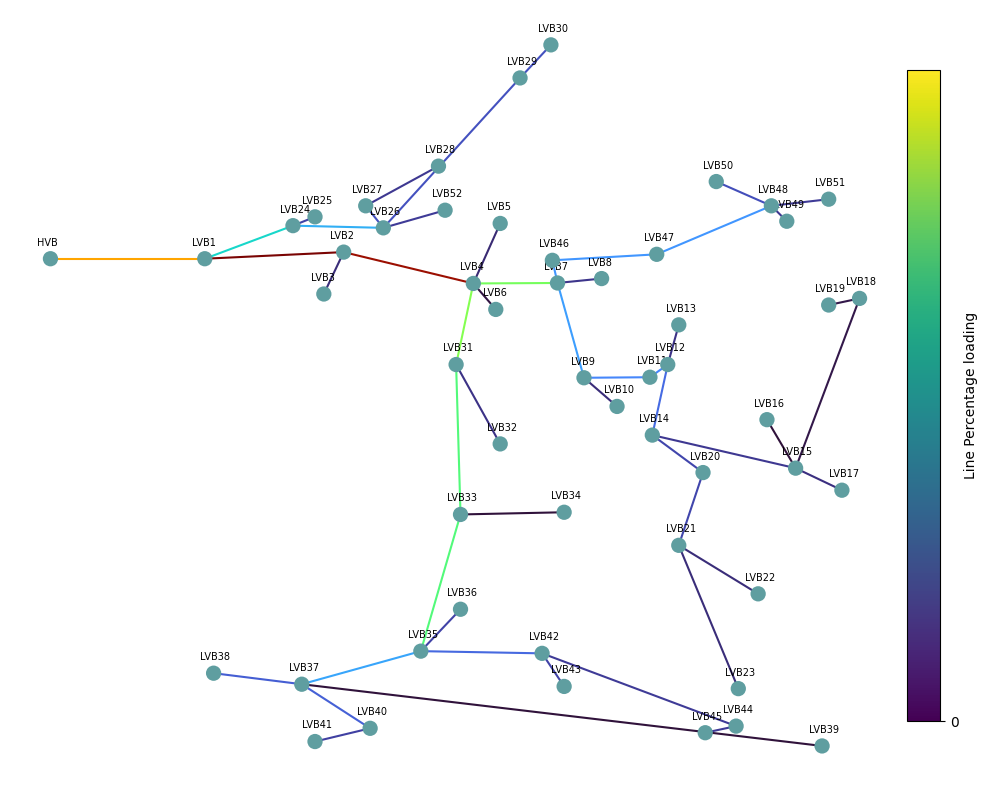

In [ ]:
import requests
import json
import time
from IPython.display import display, clear_output

TOTAL_BLOCKS = 4

PHYSICS = 0
BIOTECH = 1
MANAGEMENT = 2
CIVIL = 3

# set wait time(in seconds) before making another API call
WAIT_TIME = 5*60

# SN of energy meters installed in each block
# create a list of random strings for initialization
SN = ["initial_SN_string" for _ in range(TOTAL_BLOCKS)]

# assign SN of individual meters
SN[PHYSICS] = 'CD0FF6AB'
SN[BIOTECH] = '57DB095D'
SN[MANAGEMENT] = '8FA834AC'
SN[CIVIL] = 'DAD94549'

# TOKEN to be used for making api call
TOKEN = 'a971224e6dc04edfa62bc0e83978d854'

# create URLs to make API calls to fetch data from the Iammeter Cloud
URL = []
for i in range(TOTAL_BLOCKS):
    URL.append("http://www.iammeter.com/api/v1/site/meterdata2/" + SN[i] + "?token=" + TOKEN)


class Meter:
    def __init__(self, url: str):
        self.url = url
        # print(self.url)

    def get_meterdata(self) -> object:
        response = requests.get(self.url)

        if response.status_code == 200:
            return response
        
        print(f"Error:{response.text}")

    def show_meterdata(self) -> object:
        pass

    def get_total_power(self, meterdata: dict) -> float:
        # get the list of 3 phase data
        meterdata = meterdata['data']['values']

        # get three phase powers from each phase
        pa = meterdata[0][2]
        pb = meterdata[1][2]
        pc = meterdata[2][2]
        total_power = pa+pb+pc 
        return total_power
        

# create meter instances for each smart meter
physics_meter = Meter(URL[PHYSICS])
biotech_meter = Meter(URL[BIOTECH])
management_meter = Meter(URL[MANAGEMENT])
civil_meter = Meter(URL[CIVIL])

# run an infinite loop for continuous data retrieval
while(1):
    physics_meter_data = physics_meter.get_meterdata()
    biotech_meter_data = biotech_meter.get_meterdata()
    management_meter_data = management_meter.get_meterdata()
    civil_meter_data = civil_meter.get_meterdata()

    # # if it is not a cached result, sleep for 5 minutes - pause for 5 minutes before making another API call
    # if not getattr(meter_data, 'from_cache', False):
    #     time.sleep(WAIT_TIME)

    # convert the data into json format
    physics_meter_data = physics_meter_data.json()
    biotech_meter_data = biotech_meter_data.json()
    management_meter_data = management_meter_data.json()
    civil_meter_data = civil_meter_data.json()
    
    # get total three phase active power from each meter
    physics_meter_total_power = physics_meter.get_total_power(physics_meter_data)
    biotech_meter_total_power = biotech_meter.get_total_power(biotech_meter_data)
    management_meter_total_power = management_meter.get_total_power(management_meter_data)
    civil_meter_total_power = civil_meter.get_total_power(civil_meter_data)

    network.loads.loc['Load5', 'p_set'] = management_meter_total_power/1e6
    network.loads.loc['Load6', 'p_set'] = civil_meter_total_power/1e6
    network.loads.loc['Load16', 'p_set'] = physics_meter_total_power/1e6
    network.loads.loc['Load19', 'p_set'] = biotech_meter_total_power/1e6
    
    # calculate reactive powers assuming PF = 0.95
    network.loads.loc['Load5', 'q_set'] = (management_meter_total_power/1e6)*tan_phi
    network.loads.loc['Load6', 'q_set'] = (civil_meter_total_power/1e6)*tan_phi
    network.loads.loc['Load16', 'q_set'] = (physics_meter_total_power/1e6)*tan_phi
    network.loads.loc['Load19', 'q_set'] = (biotech_meter_total_power/1e6)*tan_phi

    # check for network consistency
    network.consistency_check()
    
    # perform newton Raphson Load Flow
    network.pf()


    # adjust bus colors
    # the first element of bus_colors correspond to HVB. since it is set as a slack bus, 
    # its color is set to cadetblue
    bus_colors = ["#5F9EA0"]
    bus_names = network.buses.index.to_list()
    for i in range(1, 53):
       bus_voltage_pu = network.buses_t.v_mag_pu.loc['now',f'LVB{i}']
       if 0.95 < bus_voltage_pu <= 1.05:
           # cadetblue color if bus voltage is between 0.95 and 1.05pu
           bus_colors.append("#5F9EA0")
       elif (0.9 < bus_voltage_pu <= 0.95) or ((1.05 < bus_voltage_pu <= 1.1)):
           # sky blue if bus voltage is between 0.9 and 0.95 pu
           bus_colors.append("#1DA1E8") 
       else:
           # red if bus voltage is less than 0.9pu or greater than 1.1 pu
           bus_colors.append("#F15151")   
    bus_colors = pd.Series(bus_colors, index=bus_names) 

    

    # adjust line colors
    # assume nominal line apparent capacity as 0.4 MVA
    s_nom_assumed = 0.4
    # calculate percentage loading
    percentage_loading = (abs(network.lines_t.p0.loc['now'])/s_nom_assumed)*100
    percentage_loading = abs(percentage_loading)

    
    fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, figsize = (12,12))
    collection = network.plot(ax = ax, 
                bus_sizes = 0.0000000012, bus_colors = bus_colors,
                line_widths=1.50, line_colors=percentage_loading, line_cmap=plt.cm.turbo, line_alpha = 1.0,
                 projection = ccrs.EqualEarth(),
                flow = None,
                )
    heatmap = plt.colorbar(collection[2], 
                 fraction = 0.035, pad = 0.008, 
                 ticks = [0, 25, 50, 75, 100, 125, 150, 175],
                 label = "Line Percentage loading",
                )
    heatmap.ax.set_yticklabels(['0', '25', '50', '75', '100', '125', '150', '175'])
    
    # print bus names alongside each bus
    for bus in network.buses.index:
        # print bus names slightly above the bus to avoid overlap
        ax.text(network.buses.loc[bus]['x']-0.00006, network.buses.loc[bus]['y']+0.00006, f"{bus}", fontsize = 7)
    
    # save figure in png format
    plt.savefig('KU_flow_plot.png')
    
    display(plt.gcf())

    # clear the previous figure beofre plotting the new figure
    clear_output(wait=True)

    # wait before making another api call
    time.sleep(WAIT_TIME)
